In [1]:
library(readxl)
library(IRdisplay)
library(magrittr)
library(tidyverse)
library(scales)
library(gridExtra)
#library(forecast)
library(ggthemes)
theme_set(theme_economist())

source("sim_random_walk_function.R")
source("compare_models_function.R")
source("sim_stationary_example_function.R")

print("Loading is completed")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




[1] "Loading is completed"


## Time Series Data Overview

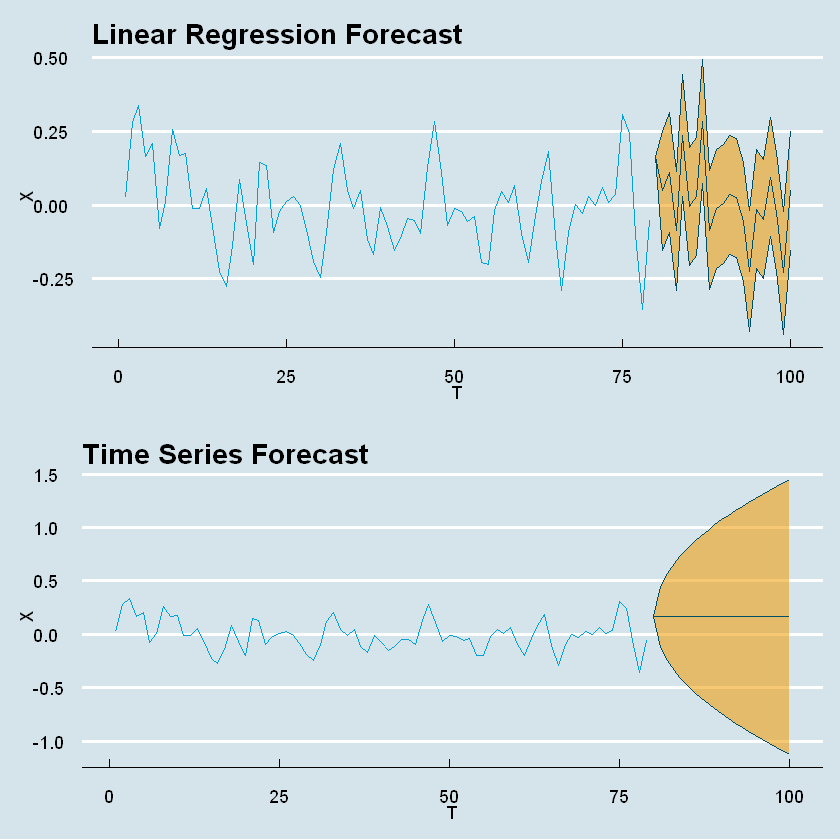

In [5]:
compare.models(n=100)

### Simulate Random Walk

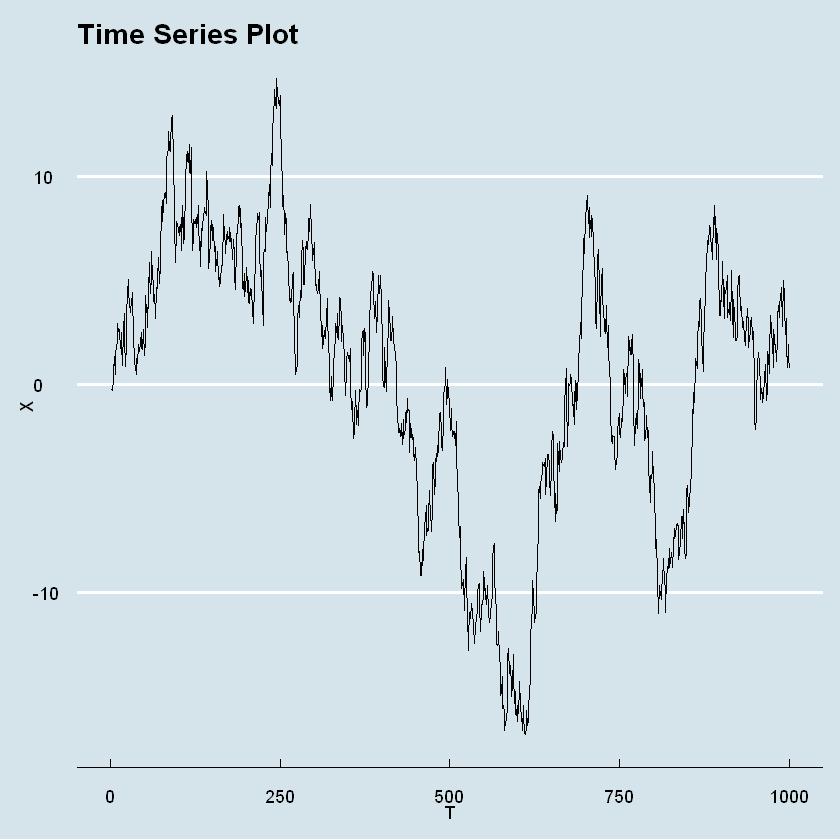

In [8]:
dat <- sim.random.walk()

dat %>% ggplot(aes(t, X)) + geom_line() + xlab("T") + ylab("X") + ggtitle("Time Series Plot")

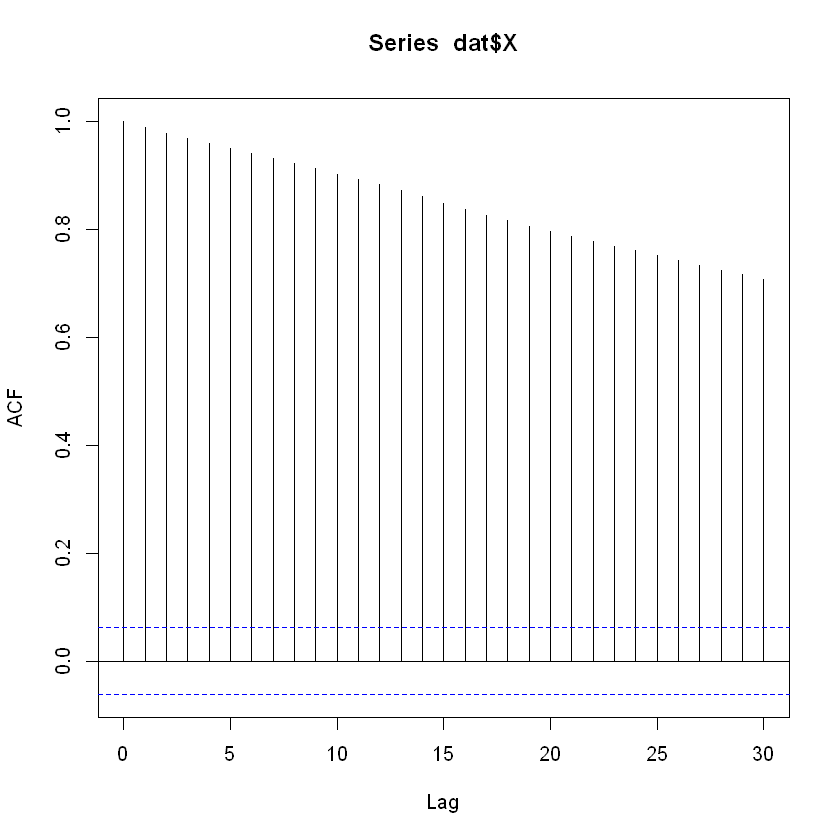

In [9]:
acf(dat$X)

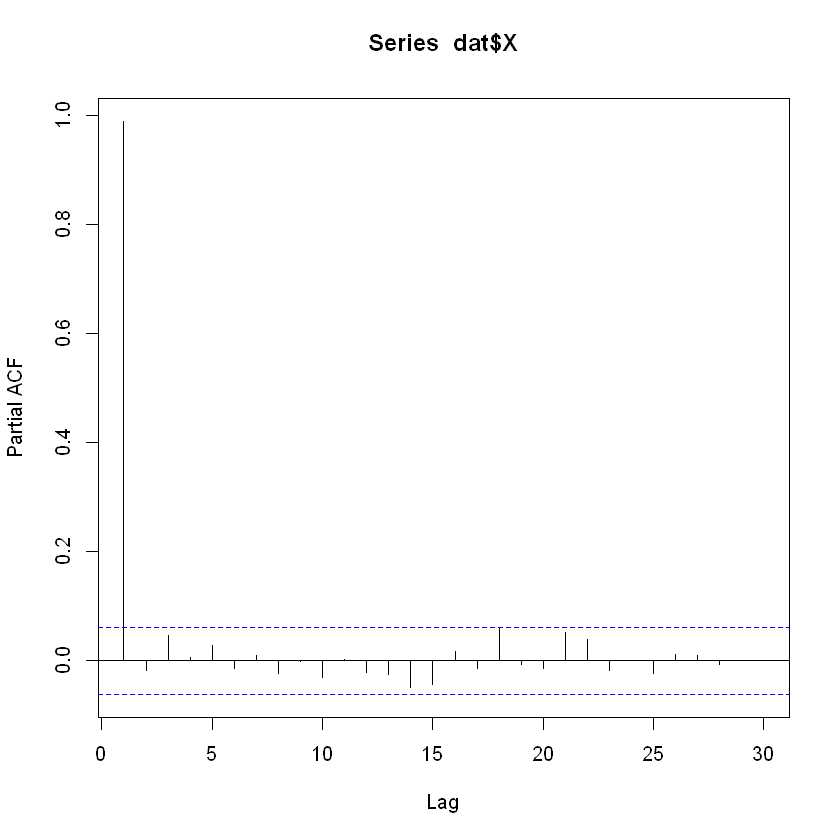

In [11]:
acf(dat$X,type = "partial")

### Stationarity

In [12]:
df <- sim.stationary.example(n=1000)
head(df) ; dim(df)

,t,X1,X2,X3
,<int>,<dbl>,<dbl>,<dbl>
1,1,0.5755834,1.675131,-0.6195184
2,2,1.0355691,1.068711,-0.1155267
3,3,2.7731122,3.264378,0.1986118
4,4,3.1343764,4.293024,0.1684661
5,5,3.9468495,5.578487,0.2207886
6,6,4.7723191,6.115237,0.7422668


[1] 1000    4

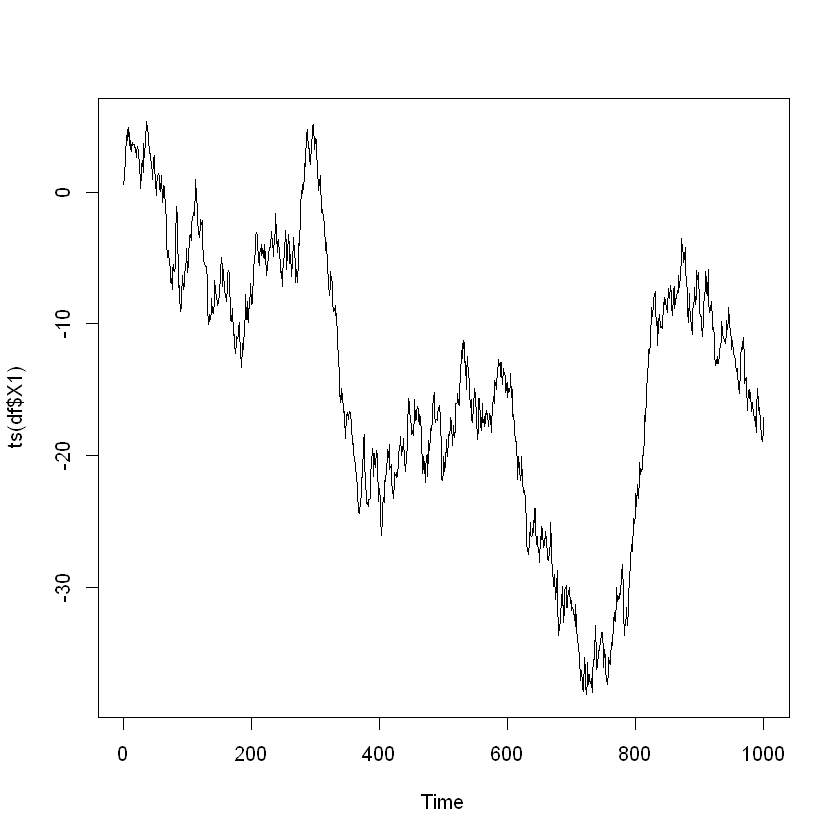

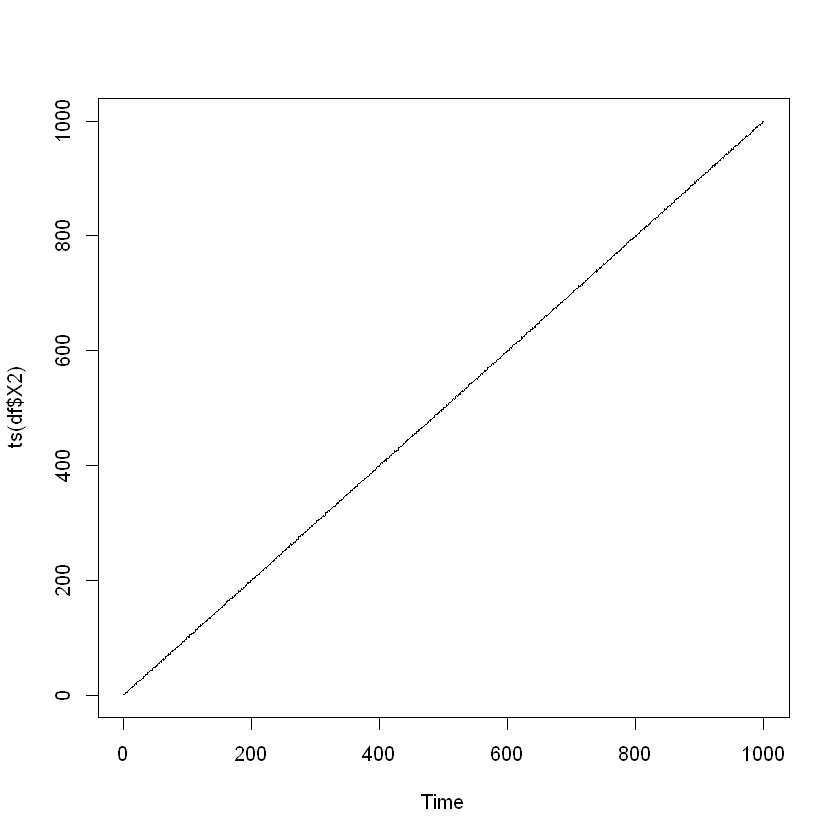

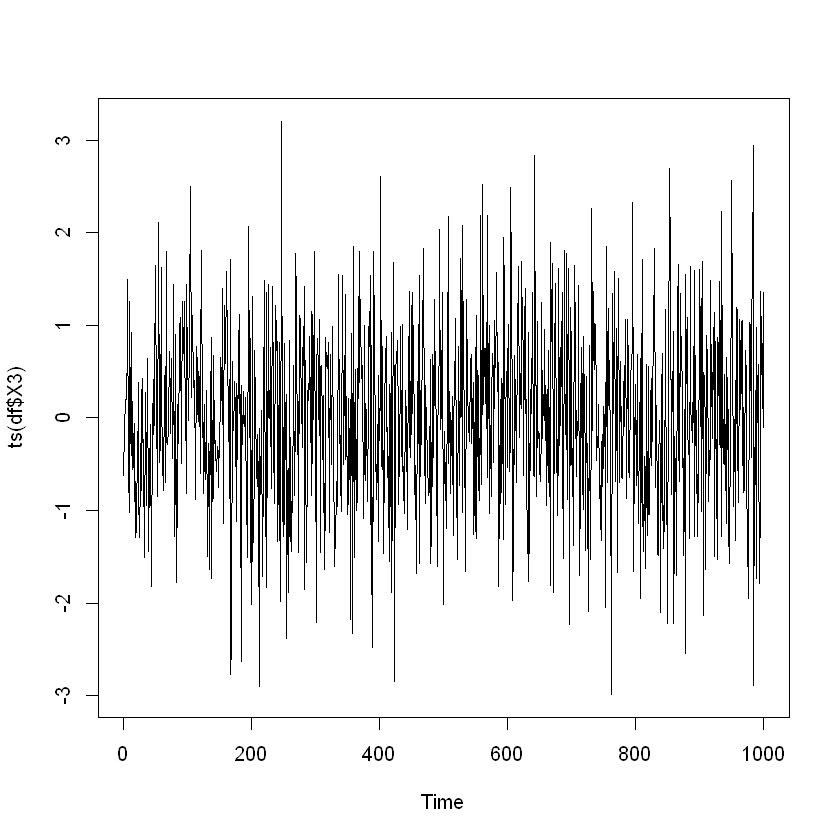

In [19]:
plot(ts(df$X1))
plot(ts(df$X2))
plot(ts(df$X3))


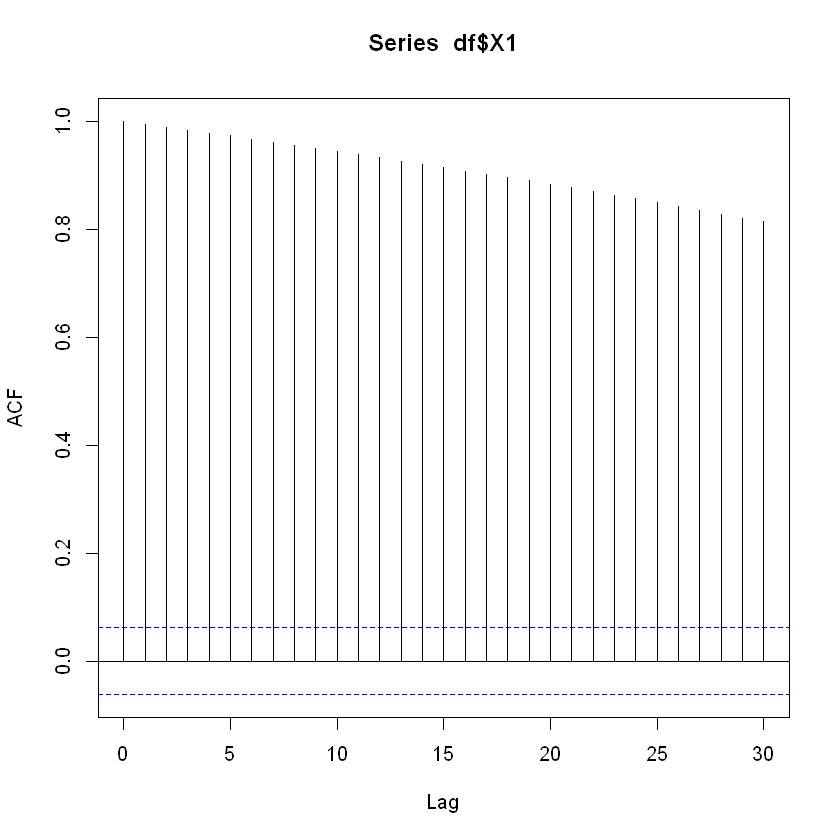

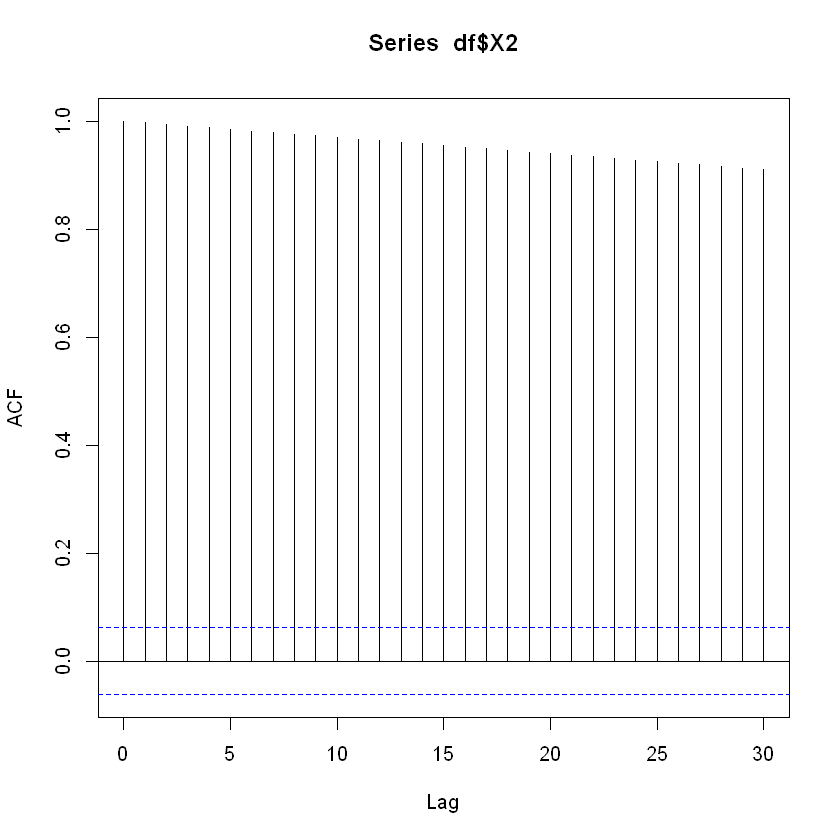

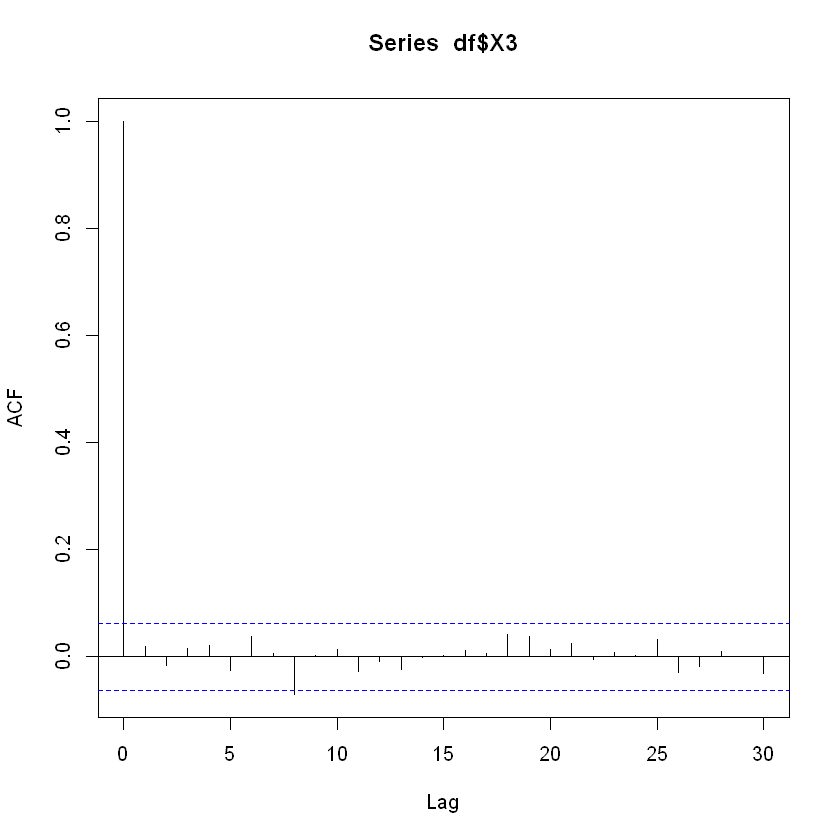

In [21]:
acf(df$X1)
acf(df$X2)
acf(df$X3)

### Differencing

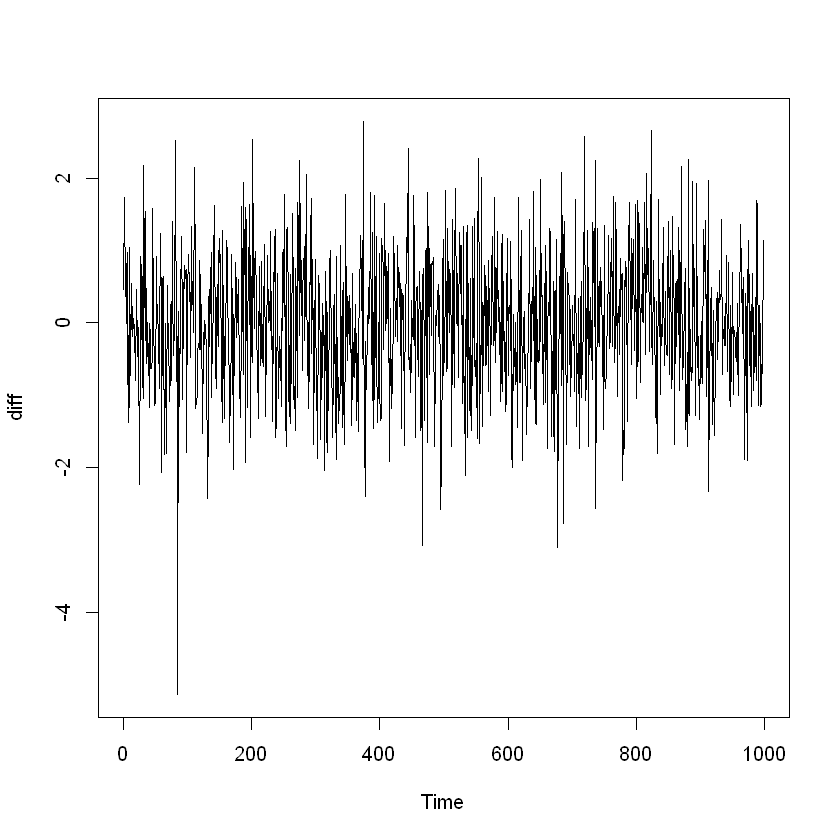

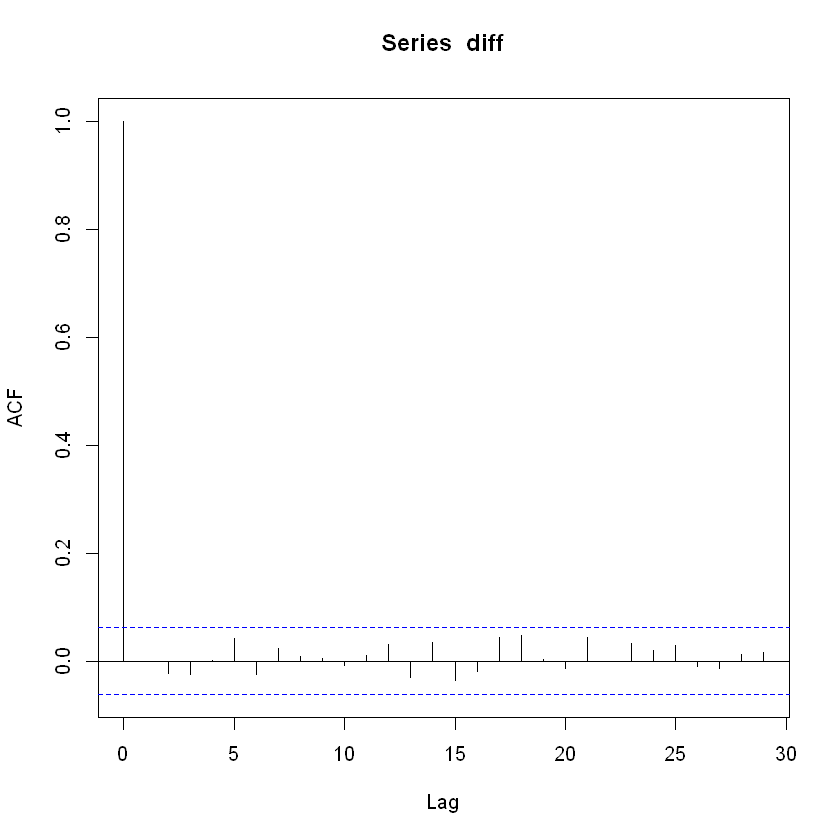

In [35]:
diff <- ts(diff(df$X1))
plot(diff)
acf(diff)


### Detrending

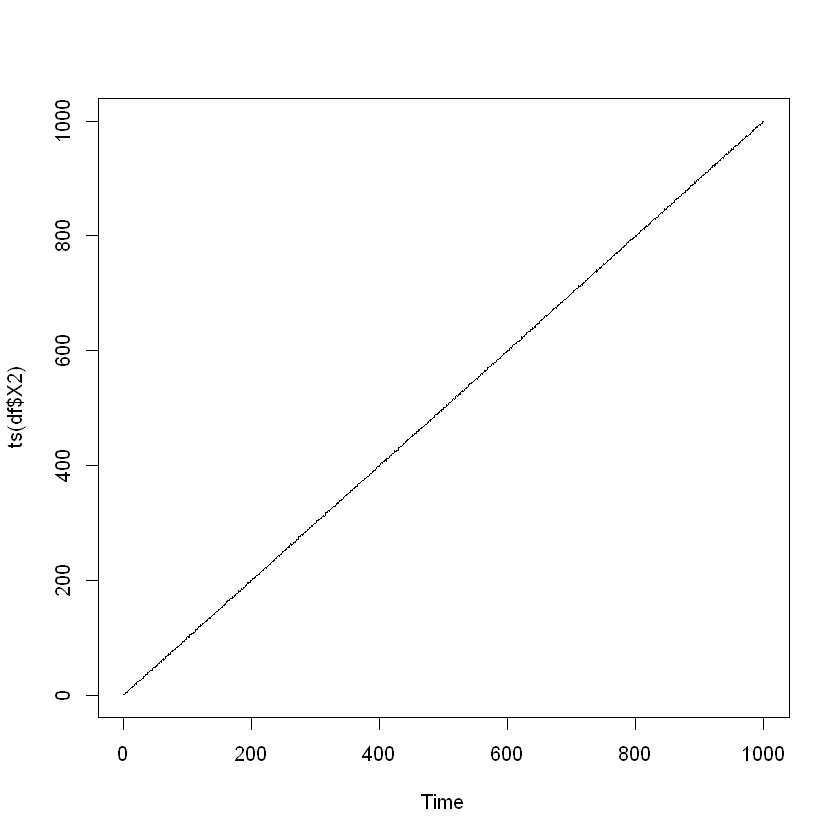

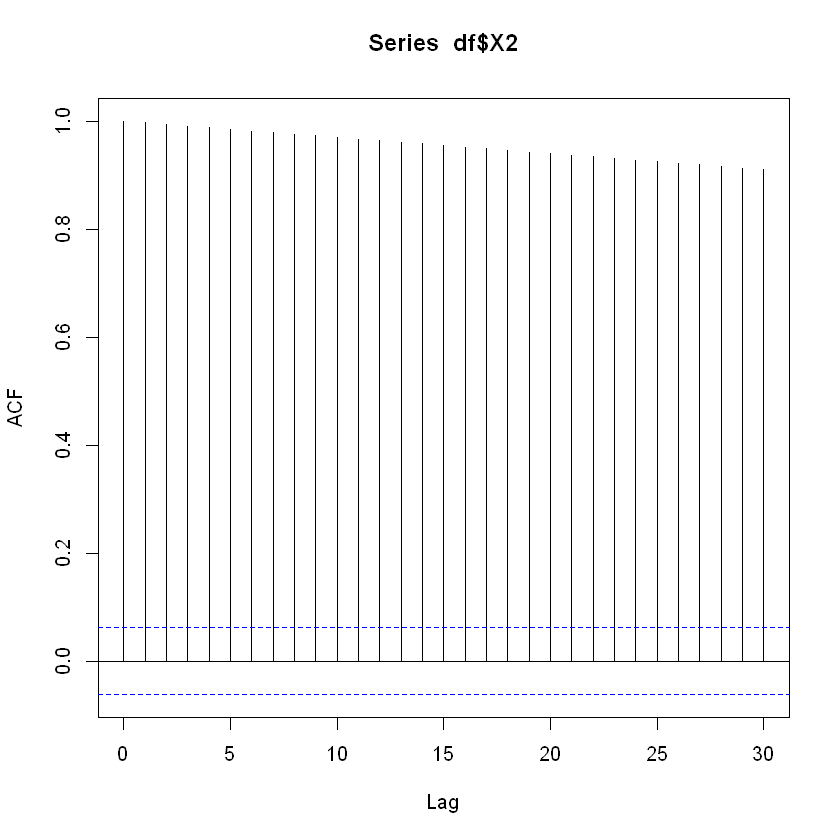

In [40]:
plot(ts(df$X2))
plot(acf(df$X2))

In [37]:
detrended <- resid(lm(X2 ~ t, data = df))

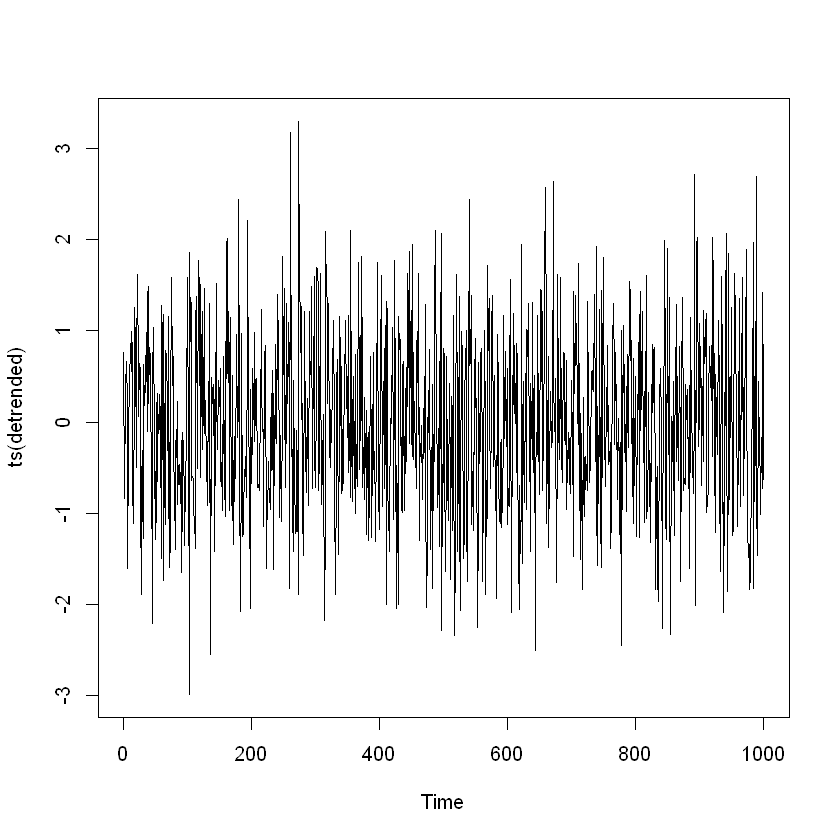

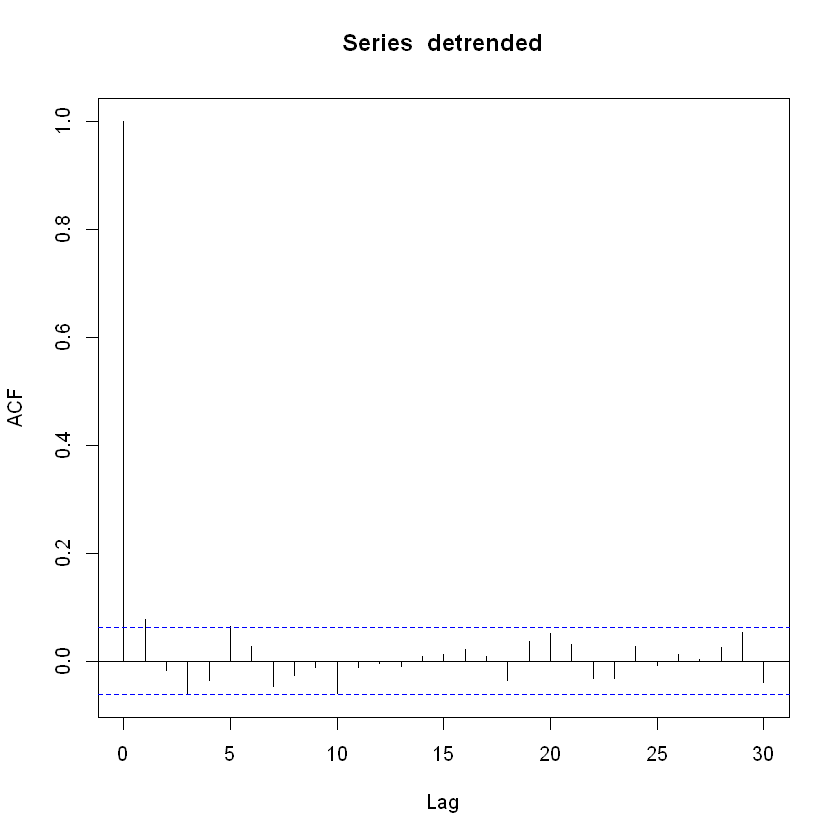

In [42]:
plot(ts(detrended))
acf(detrended)

In [16]:
df <- read.csv("Mass Monthly Unemployment Rate.csv")
head(df)

,DATE,MAURN
,<chr>,<dbl>
1,1976-01-01,11.6
2,1976-02-01,11.3
3,1976-03-01,10.9
4,1976-04-01,9.9
5,1976-05-01,9.4
6,1976-06-01,9.8


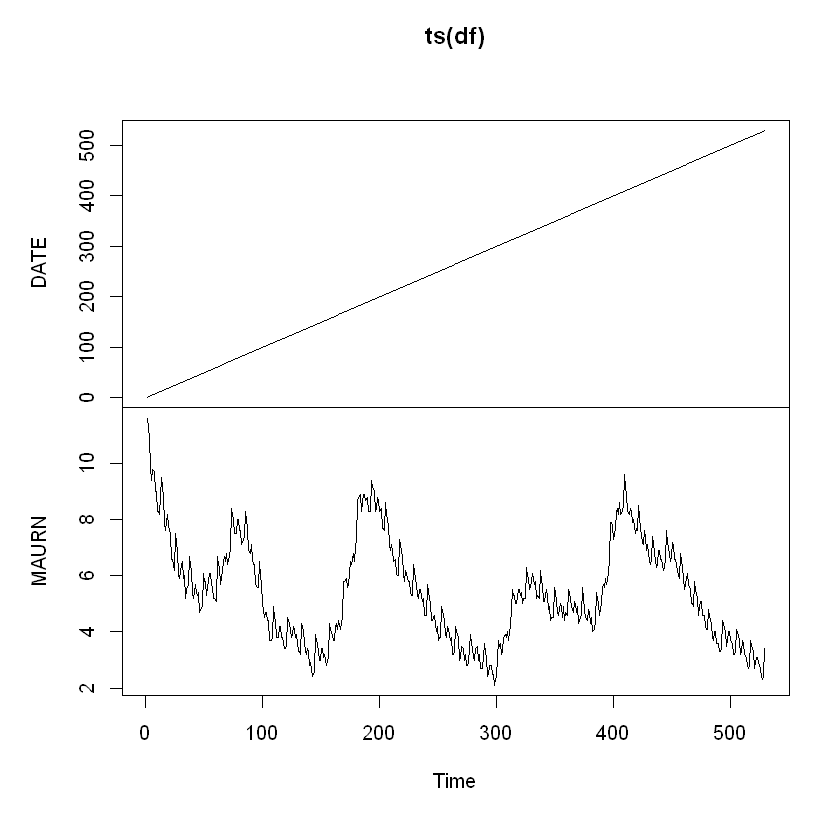

In [4]:
plot(ts(df))